# Summary

This notebook illustrates the usage of basic anomaly detection methods with sklearn (https://scikit-learn.org/stable/modules/outlier_detection.html )

In [4]:
import sys
sys.path.append('../src')
import evaluation_utils, data_utils

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import json

X shape: (1831, 21), y shape: (1831,)


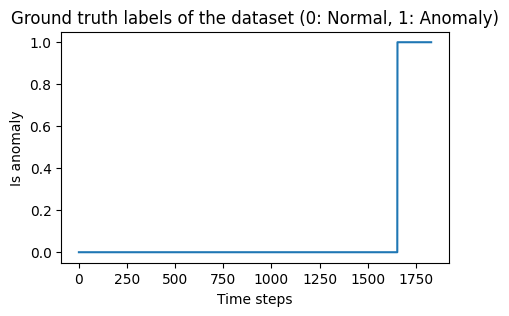

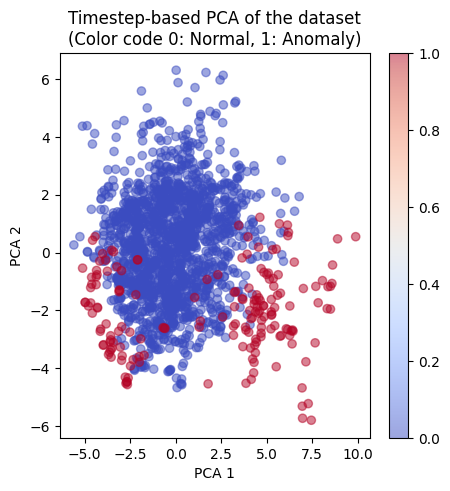

In [5]:
# Data loading
X, y = data_utils.get_data('../data/6_cardio.npz')
data_utils.plot_dataset(X, y)

In [6]:
# Define the anomaly detection methods
methods = {
    "Isolation Forest": IsolationForest(contamination=0.1),
    "One-Class SVM": OneClassSVM(nu=0.1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.1)
}

# Apply each method
for name, method in methods.items():
    if name == "Local Outlier Factor":
        predicted_anomalies = method.fit_predict(X)
    else:
        method.fit(X)
        predicted_anomalies = method.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    predicted_anomalies[predicted_anomalies == 1] = 0
    predicted_anomalies[predicted_anomalies == -1] = 1

    print(f"\n\n{name} Results:")
    scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)
    data_utils.save_results(f"results/sklearn {name}.npz", scores)
    print(json.dumps(scores, indent=4))



Isolation Forest Results:
Results saved to results/sklearn Isolation Forest.npz
{
    "AUCROC": 0.7181560697610546,
    "AUCPR": 0.2836110441876573,
    "F1": 0.48467466769068074,
    "Precision": 0.47540983606557374,
    "Recall": 0.4943181818181818,
    "Adjusted AUCROC": 0.9709969788519637,
    "Adjusted AUCPR": 0.6470588235294118,
    "Adjusted F1": 0.7857095153350855,
    "Adjusted Precision": 0.6470588235294118,
    "Adjusted Recall": 1.0
}


One-Class SVM Results:
Results saved to results/sklearn One-Class SVM.npz
{
    "AUCROC": 0.666961343037627,
    "AUCPR": 0.2113352044163913,
    "F1": 0.3922601972493124,
    "Precision": 0.3817204301075269,
    "Recall": 0.4034090909090909,
    "Adjusted AUCROC": 0.9652567975830816,
    "Adjusted AUCPR": 0.6048109965635738,
    "Adjusted F1": 0.7537426265716416,
    "Adjusted Precision": 0.6048109965635738,
    "Adjusted Recall": 1.0
}


Local Outlier Factor Results:
Results saved to results/sklearn Local Outlier Factor.npz
{
    "AUCROC